Enter thermal conductivity k (W/m·K):  100
Enter cross-sectional area A (m^2):  .5


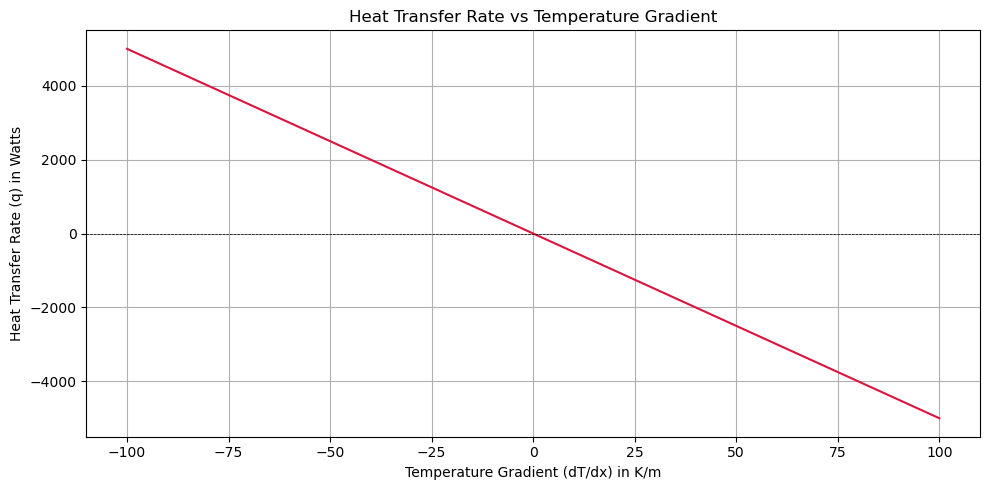

In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

k, A, x = sym.symbols("k A x")
T = sym.Function("T")(x)  
q_expression = -k * A * sym.diff(T, x)

k_value = float(input("Enter thermal conductivity k (W/m·K): "))
A_value = float(input("Enter cross-sectional area A (m^2): "))

temp_gradients = np.linspace(-100, 100, 100)  # from -100 to 100 K/m
heat_transfer_rates = []

for dTdx_value in temp_gradients:
    q_value = q_expression.subs({k: k_value, A: A_value, sym.diff(T, x): dTdx_value})
    q_value_numeric = sym.N(q_value)
    heat_transfer_rates.append(q_value_numeric)

plt.figure(figsize=(10, 5))
plt.plot(temp_gradients, heat_transfer_rates, color='crimson')
plt.title("Heat Transfer Rate vs Temperature Gradient")
plt.xlabel("Temperature Gradient (dT/dx) in K/m")
plt.ylabel("Heat Transfer Rate (q) in Watts")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()